# Affine Cipher

## Enciphering
The last type of monoalphabetic cipher we'll cover is the __Affine Cipher__. The name __affine__ comes affine functions, which are linear functions with a constant term. For example, to map plaintext to ciphertext in a $26$ letter alphabet, we would use the following affine function:

$$C = \left( m \cdot P + a \right) \mod{26}$$

where $P$ is the numerical value of a plaintext letter, $m$ is a valid multiplicative key, $a$ is a valid additive key, and $C$ is the numerical value of a ciphertext letter. Notice you use the multiplicative key first, then the additive key, then $\text{MOD}$ by $26$.

### Example
Let's look at enciphering the plaintext, `unicorn` with `m = 7` and `a = 16`
```
 plaintext:   u    n    i    c    o    r    n 
 numerical:  20   13    8    2   14   17   13
        x7: 140   91   56   14   98  119   91
       +16: 156  107   72   30  114  135  107
    MOD 26:   0    3   20    4   10    5    3
ciphertext:   A    D    U    E    K    F    D
```

### Notes on Keys
Since we're still multiplying as part of our algorithm, only the valid multiplicative keys we discovered in the previous section can be used. If we choose `m = 1`, this is essentially a Caesar Cipher, since multiplying by $1$ does not change the value of $P$.

Like with the multiplicative cipher, we can visualize the transformation from plaintext to ciphertext graphically by plotting the points with integer values on the line $C = \left( m \cdot P + a \right) \pmod{26}$.


In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

def f(P, m, a):
    return (m*P + a)%26

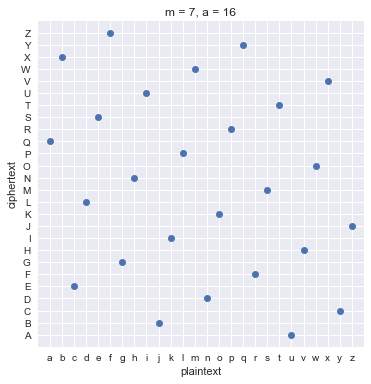

In [40]:
t1 = np.arange(0, 26, 1)

plt.xticks(np.arange(26), ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.yticks(np.arange(26), ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H','I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'))
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-1, 26, -1, 26])
plt.xlabel('plaintext')
plt.ylabel('ciphertext')
plt.title('m = 7, a = 16')
plt.rcParams["figure.figsize"] = (6,6)

plt.plot(t1, f(t1, 7, 16), 'o')

plt.show()

## Deciphering the Affine Cipher
To determine how to decipher a message that was encrypted using the Affine Cipher, let's solve the affine function from earlier for $P$ in terms of $C$. Remember, we won't divide by $m$ when working in modulo $26$, we'll multiply by the multiplicative inverse of $m$, denoted as $m^{-1}$.

$$
\begin{align}
    C &= \left( m \cdot P + a \right) \mod{26} \\
    C - a &= m \cdot P \mod{26} \\
    \left(C - a\right)\cdot m^{-1} &= P \mod{26} \\
    P &= \left(C - a\right)\cdot m^{-1} \mod{26} 
\end{align}
$$

So, to decipher a message, you'll take the numerical value of each ciphertext letter, first subtract $a$ from it, then multiply by the multiplicative inverse of $m$, and lastly $\text{MOD}$ by $26$.

## Example
Let's now decipher our test message with ciphertext `ADUEK FD` with `m = 7` and `a = 16`. We'll first need to determine the multiplicative inverse of $7$ in modulo $26$. You may recall from the section on Multiplicative Ciphers that the inverse of $7$ is $15$, which we can confirm because $7 \cdot 15 = 105$ and $1 \equiv 105 \pmod{26}$.
```
ciphertext:    A     D     U     E     K     F     D
 numerical:    0     3    20     4    10     5     3
       -16:  -16   -13     4   -12    -6   -11   -13
       x15: -240  -195    60  -180   -90  -165  -195 
    MOD 26:   20    13     8     2    14    17    13
 plaintext:    u     n     i     c     o     r     n
```

## Exercises for the Reader
* Can you write Python code to encipher and decipher messages using the Affine Cipher?
* How many unique ways could you encipher a message using an Affine Cipher? Asked another way, how many key pairings are there?